In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df= pd.read_csv('nfa_2019_public_data.csv')

C:\Users\BOSSS 32\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,qscore
0,Armenia,1992,1,AreaPerCap,0.140292,0.199546,0.097188051,0.036888,0.029320,0.000000,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,483000.000000,687000.000000,334600,127000.000000,100943.000800,0.000000,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,0.159804,0.135261,0.084003213,0.013742,0.033398,0.000000,4.262086e-01,3A
3,Armenia,1992,1,BiocapTotGHA,550176.242700,465677.972200,289207.1078,47311.551720,114982.279300,0.000000,1.467355e+06,3A
4,Armenia,1992,1,EFConsPerCap,0.387510,0.189462,1.26E-06,0.004165,0.033398,1.114093,1.728629e+00,3A


In [4]:
df.tail()

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,qscore
72181,World,2016,5001,BiocapTotGHA,3.984702e+09,1.504757e+09,5111762779.0,1.095445e+09,4.726163e+08,0.000000e+00,1.216928e+10,3A
72182,World,2016,5001,EFConsPerCap,5.336445e-01,1.402092e-01,0.273495,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A
72183,World,2016,5001,EFConsTotGHA,3.984702e+09,1.046937e+09,2042179333.0,6.701039e+08,4.726163e+08,1.229237e+10,2.050891e+10,3A
72184,World,2016,5001,EFProdPerCap,5.336445e-01,1.402092e-01,0.273495,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A
72185,World,2016,5001,EFProdTotGHA,3.984702e+09,1.046937e+09,2042179333.0,6.701039e+08,4.726163e+08,1.229237e+10,2.050891e+10,3A


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72186 entries, 0 to 72185
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         72186 non-null  object 
 1   year            72186 non-null  int64  
 2   country_code    72186 non-null  int64  
 3   record          72186 non-null  object 
 4   crop_land       51714 non-null  float64
 5   grazing_land    51714 non-null  float64
 6   forest_land     51714 non-null  object 
 7   fishing_ground  51713 non-null  float64
 8   built_up_land   51713 non-null  float64
 9   carbon          51713 non-null  float64
 10  total           72177 non-null  float64
 11  qscore          72185 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 6.6+ MB


In [6]:
df.dtypes

country            object
year                int64
country_code        int64
record             object
crop_land         float64
grazing_land      float64
forest_land        object
fishing_ground    float64
built_up_land     float64
carbon            float64
total             float64
qscore             object
dtype: object

In [7]:
df.describe()

,year,country_code,crop_land,grazing_land,fishing_ground,built_up_land,carbon,total
count,72186.000000,72186.000000,5.171400e+04,5.171400e+04,5.171300e+04,5.171300e+04,5.171300e+04,7.217700e+04
mean,1990.263154,155.618915,1.920772e+07,1.352875e+07,1.004860e+07,1.984737e+06,3.072609e+07,7.792960e+07
std,16.018761,390.261979,1.685819e+08,1.294180e+08,1.081375e+08,1.730488e+07,3.989630e+08,7.455443e+08
min,1961.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.876963e-02
25%,1977.000000,59.000000,3.581080e-01,1.948302e-01,8.005409e-02,3.786298e-02,0.000000e+00,1.894023e+00
50%,1991.000000,121.000000,3.251810e+00,9.978667e+00,6.154094e+00,2.044437e-01,0.000000e+00,8.292253e+03
75%,2004.000000,193.000000,3.610817e+06,1.734192e+06,9.450000e+05,3.867180e+05,1.915736e+01,1.532959e+07
max,2016.000000,5001.000000,3.984702e+09,3.417089e+09,2.979605e+09,4.726163e+08,1.257160e+10,2.061182e+10


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,72186.0,1.990263e+03,1.601876e+01,1961.00000,1977.000000,1991.000000,2.004000e+03,2.016000e+03
country_code,72186.0,1.556189e+02,3.902620e+02,1.00000,59.000000,121.000000,1.930000e+02,5.001000e+03
crop_land,51714.0,1.920772e+07,1.685819e+08,0.00000,0.358108,3.251810,3.610817e+06,3.984702e+09
grazing_land,51714.0,1.352875e+07,1.294180e+08,0.00000,0.194830,9.978667,1.734192e+06,3.417089e+09
fishing_ground,51713.0,1.004860e+07,1.081375e+08,0.00000,0.080054,6.154094,9.450000e+05,2.979605e+09
built_up_land,51713.0,1.984737e+06,1.730488e+07,0.00000,0.037863,0.204444,3.867180e+05,4.726163e+08
carbon,51713.0,3.072609e+07,3.989630e+08,0.00000,0.000000,0.000000,1.915736e+01,1.257160e+10
total,72177.0,7.792960e+07,7.455443e+08,0.01877,1.894023,8292.252511,1.532959e+07,2.061182e+10


In [9]:
df.describe().sum()

year              8.414128e+04
country_code      7.810688e+04
crop_land         4.176155e+09
grazing_land      3.561822e+09
fishing_ground    3.098788e+09
built_up_land     4.923444e+08
carbon            1.300134e+10
total             2.145071e+10
dtype: float64

In [10]:
df.isnull()

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,qscore
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
72181,False,False,False,False,False,False,False,False,False,False,False,False
72182,False,False,False,False,False,False,False,False,False,False,False,False
72183,False,False,False,False,False,False,False,False,False,False,False,False
72184,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

country               0
year                  0
country_code          0
record                0
crop_land         20472
grazing_land      20472
forest_land       20472
fishing_ground    20473
built_up_land     20473
carbon            20473
total                 9
qscore                1
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

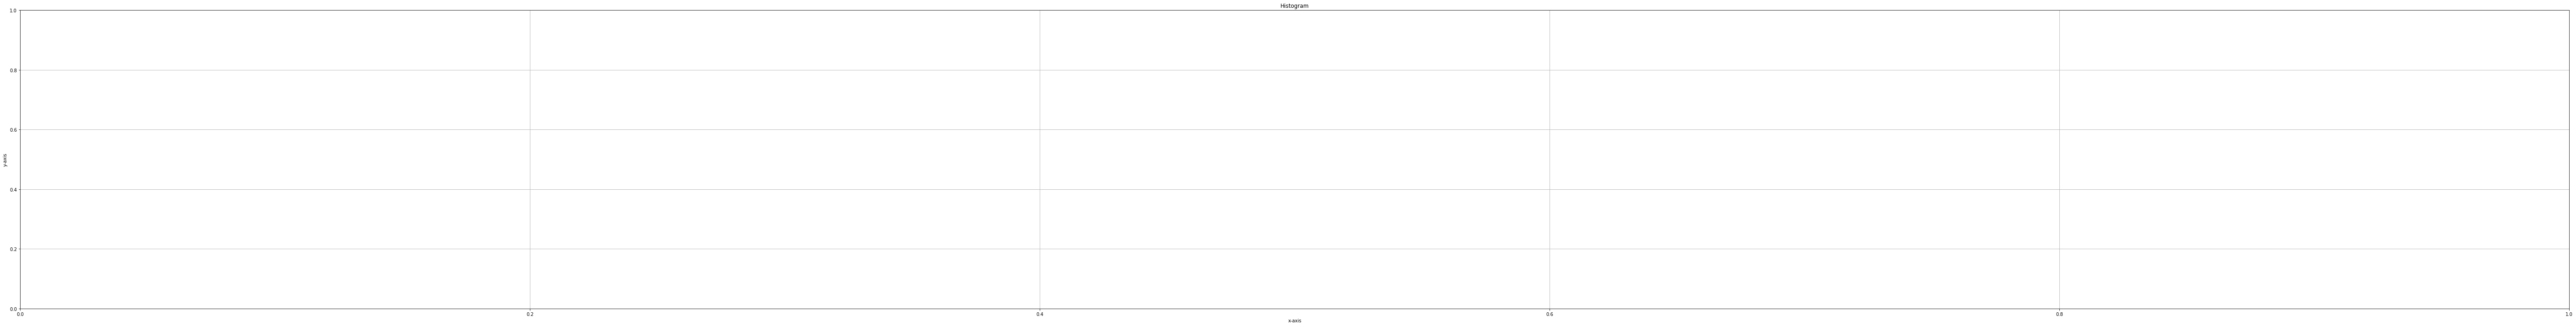

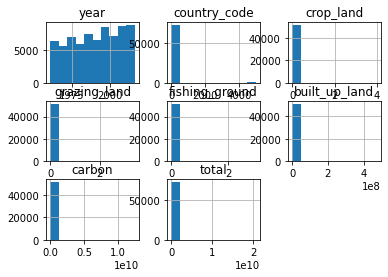

In [12]:
plt.figure(figsize=(100,12))
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Histogram')
plt.grid(True)
df.hist()
plt.show

In [13]:
df.corr()

,year,country_code,crop_land,grazing_land,fishing_ground,built_up_land,carbon,total
year,1.000000,-0.007549,0.016051,-0.006314,-0.004076,0.035558,0.019156,0.006528
country_code,-0.007549,1.000000,0.642240,0.592193,0.528693,0.577763,0.446023,0.654637
crop_land,0.016051,0.642240,1.000000,0.722896,0.612383,0.963471,0.764573,0.965973
grazing_land,-0.006314,0.592193,0.722896,1.000000,0.965757,0.654255,0.338858,0.816314
fishing_ground,-0.004076,0.528693,0.612383,0.965757,1.000000,0.548781,0.211500,0.722029
built_up_land,0.035558,0.577763,0.963471,0.654255,0.548781,1.000000,0.752543,0.913638
carbon,0.019156,0.446023,0.764573,0.338858,0.211500,0.752543,1.000000,0.783386
total,0.006528,0.654637,0.965973,0.816314,0.722029,0.913638,0.783386,1.000000


<AxesSubplot:>

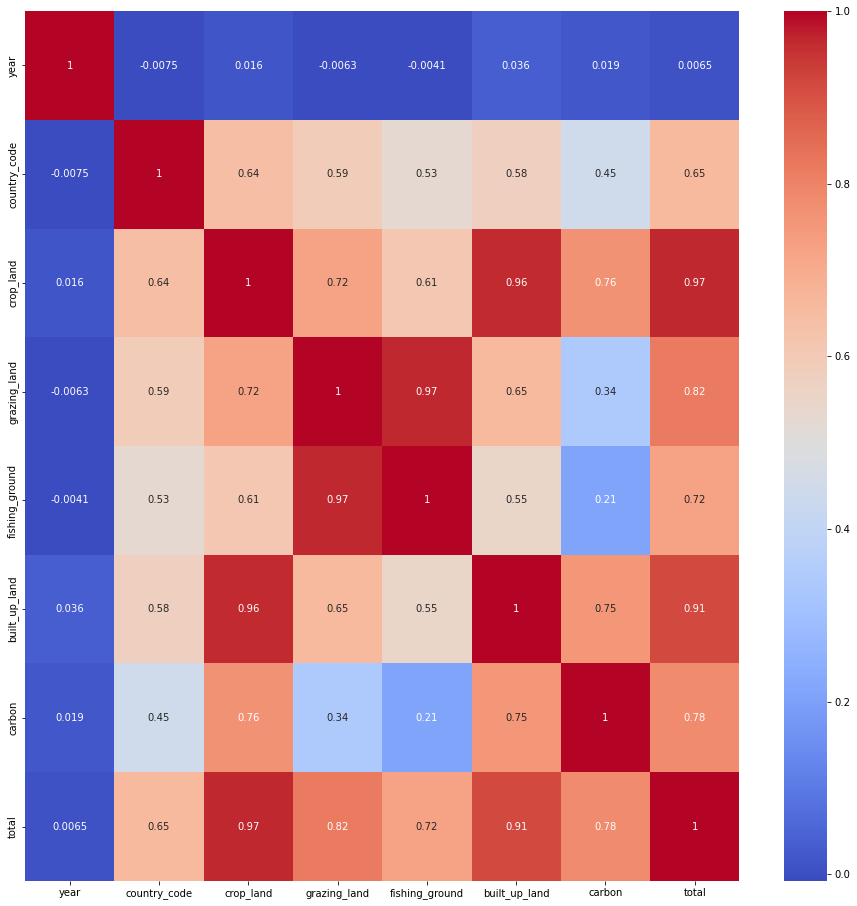

In [14]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),cmap= 'coolwarm',annot=True)

In [15]:
df.isna()

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,qscore
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
72181,False,False,False,False,False,False,False,False,False,False,False,False
72182,False,False,False,False,False,False,False,False,False,False,False,False
72183,False,False,False,False,False,False,False,False,False,False,False,False
72184,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isna().sum()

country               0
year                  0
country_code          0
record                0
crop_land         20472
grazing_land      20472
forest_land       20472
fishing_ground    20473
built_up_land     20473
carbon            20473
total                 9
qscore                1
dtype: int64

In [17]:
df.columns

Index(['country', 'year', 'country_code', 'record', 'crop_land',
       'grazing_land', 'forest_land', 'fishing_ground', 'built_up_land',
       'carbon', 'total', 'qscore'],
      dtype='object')

In [18]:
df

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,qscore
0,Armenia,1992,1,AreaPerCap,1.402924e-01,1.995463e-01,0.097188051,3.688847e-02,2.931995e-02,0.000000e+00,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,4.830000e+05,6.870000e+05,334600,1.270000e+05,1.009430e+05,0.000000e+00,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,1.598044e-01,1.352610e-01,0.084003213,1.374213e-02,3.339780e-02,0.000000e+00,4.262086e-01,3A
3,Armenia,1992,1,BiocapTotGHA,5.501762e+05,4.656780e+05,289207.1078,4.731155e+04,1.149823e+05,0.000000e+00,1.467355e+06,3A
4,Armenia,1992,1,EFConsPerCap,3.875102e-01,1.894622e-01,1.26E-06,4.164833e-03,3.339780e-02,1.114093e+00,1.728629e+00,3A
...,...,...,...,...,...,...,...,...,...,...,...,...
72181,World,2016,5001,BiocapTotGHA,3.984702e+09,1.504757e+09,5111762779.0,1.095445e+09,4.726163e+08,0.000000e+00,1.216928e+10,3A
72182,World,2016,5001,EFConsPerCap,5.336445e-01,1.402092e-01,0.273495,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A
72183,World,2016,5001,EFConsTotGHA,3.984702e+09,1.046937e+09,2042179333.0,6.701039e+08,4.726163e+08,1.229237e+10,2.050891e+10,3A
72184,World,2016,5001,EFProdPerCap,5.336445e-01,1.402092e-01,0.273495,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A


In [19]:
df.nunique()

country             193
year                 56
country_code        193
record                8
crop_land         36869
grazing_land      40629
forest_land       49103
fishing_ground    45244
built_up_land     24774
carbon            25493
total             71690
qscore                5
dtype: int64

In [20]:
pwd

'C:\\Users\\BOSSS 32\\Downloads'

In [21]:
df['qscore'].unique()         #Used to obtain 'UNIQUE ELMENTS'in a dataset.

array(['3A', '2A', '2B', '1A', '1B', nan], dtype=object)

In [22]:
df.groupby('qscore').size() 

qscore
1A       16
1B       16
2A    10576
2B    10096
3A    51481
dtype: int64

In [23]:
df.qscore.value_counts()

3A    51481
2A    10576
2B    10096
1A       16
1B       16
Name: qscore, dtype: int64

In [24]:
df.groupby('qscore')['year'].value_counts()

qscore  year
1A      2016     16
1B      2016     16
2A      2004    224
        2005    224
        2006    224
               ... 
3A      1964    768
        1965    768
        1963    744
        1962    741
        1961    736
Name: year, Length: 170, dtype: int64

In [25]:
df.isna().sum()                       #the same as "df.isnull().sum()" 

country               0
year                  0
country_code          0
record                0
crop_land         20472
grazing_land      20472
forest_land       20472
fishing_ground    20473
built_up_land     20473
carbon            20473
total                 9
qscore                1
dtype: int64

In [26]:
#We drop the rows with missing values. 

In [27]:
df= df.dropna()
df.isna().sum()

country           0
year              0
country_code      0
record            0
crop_land         0
grazing_land      0
forest_land       0
fishing_ground    0
built_up_land     0
carbon            0
total             0
qscore            0
dtype: int64

In [28]:
df['qscore'].unique()

array(['3A', '2A', '1A'], dtype=object)

In [29]:
df.groupby('qscore').size()      # To check class size after dropping the missing values

qscore
1A       16
2A      224
3A    51473
dtype: int64

In [30]:
#Aafter removing the missing values, only three classes are left (1A,2A,3A) and there is an imbalance in the distribution of the 3 classes:
# we handle the imbalance such as oversampling and undersampling by;
#1. Oversampling involves increasing the number of instances in the class with fewer instances
#2.  while undersampling #involves reducing the data points in the class with more instances.
#3. we will convert this to a binary classification problem by combining class '2A'and '1A '.


In [31]:
df[ 'qscore' ] = df[ 'qscore' ].replace([ '1A' ], '2A' )                     #Combines values of 1A and 2A 
df.qscore.value_counts() 

C:\Users\BOSSS3~1\AppData\Local\Temp/ipykernel_6884/4005285227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ 'qscore' ] = df[ 'qscore' ].replace([ '1A' ], '2A' )                     #Combines values of 1A and 2A


3A    51473
2A      240
Name: qscore, dtype: int64

In [32]:
df_2A = df[df.qscore== '2A' ]
df_3A = df[df.qscore== '3A' ].sample( 350 )
data_df = df_2A.append(df_3A) 

In [33]:
import sklearn.utils
data_df = sklearn.utils.shuffle(data_df)
data_df = data_df.reset_index(drop= True )
data_df.shape
data_df.qscore.value_counts()

3A    350
2A    240
Name: qscore, dtype: int64

In [34]:
#More Processing by dropping low correlation columns

In [35]:
data_df= data_df.drop(columns=['country_code','country','year'])

In [36]:
data_df

,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,qscore
0,BiocapTotGHA,2.073840e+06,3.367311e+06,4651671.219,2.944748e+06,2.059318e+05,0.000000e+00,1.324350e+07,3A
1,EFProdTotGHA,2.399867e+07,2.306905e+06,161921.5056,2.831349e+05,7.396494e+05,8.067999e+07,1.081703e+08,3A
2,EFConsPerCap,6.173264e-01,4.265823e-01,0.120721448,5.634076e-02,4.450322e-02,7.947046e+00,9.212520e+00,3A
3,EFConsTotGHA,6.264528e+06,6.039744e+05,3899932.798,2.034638e+05,1.559617e+06,2.269689e+07,3.522841e+07,2A
4,EFConsPerCap,7.654351e-01,3.427931e-01,0.488787773,7.988275e-02,8.078410e-02,3.638878e+00,5.396561e+00,3A
...,...,...,...,...,...,...,...,...,...
585,BiocapPerCap,3.260866e-01,1.214941e-02,0.054564945,3.414796e-02,5.653916e-02,0.000000e+00,4.834881e-01,3A
586,BiocapTotGHA,1.923300e+06,6.579948e+05,82961.29792,7.926084e+04,2.966498e+05,0.000000e+00,3.040167e+06,3A
587,EFProdPerCap,2.073526e-01,1.934319e-01,0.26312955,8.346993e-02,2.523715e-02,2.609595e+00,3.382216e+00,2A
588,BiocapPerCap,1.013487e-01,2.606432e+00,0.038436436,1.231414e+00,4.536969e-02,0.000000e+00,4.023001e+00,2A


In [37]:
X = data_df.drop(columns= 'qscore' )          # We drop QScore b/c it is our target varriable and should be on y-axis.
y = data_df[ 'qscore' ]

In [38]:
#Split the data into training and testing sets

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3 , random_state= 0 )
y_train.value_counts()

3A    246
2A    167
Name: qscore, dtype: int64

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(413, 8)
(177, 8)
(413,)
(177,)


In [41]:
#There is still an imbalance in the class distribution. For this, we use SMOTE only on the training data to handle this.
#Encode categorical variable as shown below

In [42]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x_train['record'] = encoder.fit_transform(x_train['record'])
x_test['record'] = encoder.fit_transform(x_test['record'])

In [43]:
print(x_train.shape)
print(x_test.shape)

(413, 8)
(177, 8)


In [44]:
pip install imbalanced-learn --user

Note: you may need to restart the kernel to use updated packages.


In [45]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [46]:
import imblearn
from imblearn.over_sampling import SMOTE           
smote = SMOTE(random_state= 1 )
x_train_balanced, y_balanced = smote.fit_resample(x_train, y_train)         # use "fit_resample" instead of 'fit_sample' as published 

In [47]:
print(x_train_balanced.shape)
print(y_balanced.shape)

(492, 8)
(492,)


In [48]:

#If you import like this
#from imblearn.over_sampling import SMOTE
#you need to do fit_resample()
#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_train_df = scaler.fit_transform(x_train_balanced.drop(columns=[ 'record' ]))
normalised_train_df = pd.DataFrame(normalised_train_df,columns=x_train_balanced.drop(columns=[ 'record' ]).columns)
normalised_train_df[ 'record' ] = x_train_balanced[ 'record' ]

In [50]:
print(normalised_train_df.shape)

(492, 8)


In [51]:
x_test = x_test.reset_index(drop= True )
normalised_test_df = scaler.transform(x_test.drop(columns=[ 'record' ]))
normalised_test_df = pd.DataFrame(normalised_test_df,columns=x_test.drop(columns=[ 'record' ]).columns)
normalised_test_df[ 'record' ] = x_test[ 'record' ] 

In [52]:
print(normalised_test_df.shape)

(177, 8)


In [53]:
#Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(normalised_train_df, y_balanced)

LogisticRegression()

In [55]:
#returns 

In [56]:
LogisticRegression(C= 1.0 , class_weight= None , dual= False , fit_intercept= True ,
 intercept_scaling= 1 , l1_ratio= None , max_iter= 100 ,
 multi_class= 'auto' , n_jobs= None , penalty= 'l2' ,
 random_state= None , solver= 'lbfgs' , tol= 0.0001 , verbose= 0 ,
 warm_start= False ) 

LogisticRegression()

In [57]:
#LEASON 2

In [58]:
#Measuring Classification Performance
#.Cross Validation
#1. K-Fold Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, normalised_train_df, y_balanced, cv= 5 , scoring= 'f1_macro' )
scores 


array([0.48397471, 0.48463815, 0.40419287, 0.61923764, 0.39211342])

##### K-Fold Cross Validation 

In [60]:
from sklearn.model_selection import KFold
kf = KFold(n_splits= 5 )
kf.split(normalised_train_df)
f1_scores = []

In [61]:
#Run for every split
#NOTE
#1.Use Tab Key for Indentation
#2. Ensure the no. of vars. in LHS = no the of vars. in RHS, eg: y_train, y_test = y_balanced[train_index],y_balanced[test_index] ie 2 vars on each side 

In [62]:
for train_index, test_index in kf.split(normalised_train_df,y_balanced):
    x_train, x_test = normalised_train_df.iloc[train_index],normalised_train_df.iloc[test_index]
    y_train, y_test = y_balanced[train_index],y_balanced[test_index]
    model = LogisticRegression().fit(x_train, y_train)

In [63]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(394, 8)
(98, 8)
(394,)
(98,)


In [64]:
y_train.shape

(394,)

In [65]:
#save result to list

In [66]:
from sklearn.metrics import f1_score
f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test), pos_label= '2A' )* 100 )

In [67]:
f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test),pos_label= '2A' )* 100 )

In [68]:
#2.STRATIFIED F-FOLD CROSS VALIDATION

In [69]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits= 5 , shuffle= True , random_state= 1 )
f1_scores = []

In [70]:
# RUN fo every SPLIT

In [71]:
for train_index, test_index in skf.split(normalised_train_df, y_balanced):
    x_train, x_test = np.array(normalised_train_df)[train_index],np.array(normalised_train_df)[test_index]
    y_train, y_test = y_balanced[train_index], y_balanced[test_index]
    model = LogisticRegression().fit(x_train, y_train)

In [72]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(394, 8)
(98, 8)
(394,)
(98,)


In [73]:
print(y_train.shape)
print(y_test.shape)

(394,)
(98,)


In [74]:
y_train.shape

(394,)

In [75]:
#Save Result to List

In [76]:
from sklearn.metrics import f1_score
f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test), pos_label= '2A' ))

In [77]:
#3.Leave One Out Cross Validation (LOOCV)

In [78]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(LogisticRegression(), normalised_train_df, y_balanced, cv=loo, scoring= 'f1_macro' )
average_score = scores.mean() * 100 

In [79]:
average_score

44.51219512195122

In [80]:
print(y_train.shape)
print(y_test.shape)


(394,)
(98,)


In [81]:
#Confussion Matrix

In [91]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix
new_predictions = log_reg.predict(x_test)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions, labels=[ '2A' , '3A' ])

C:\Users\BOSSS 32\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [92]:
print(cnf_mat)

[[29 20]
 [32 17]]


In [ ]:
normalised_test_df.shape

In [ ]:
y_test.shape

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,new_predictions))

In [ ]:
y_test.shape

In [ ]:
y_pred.shape

In [ ]:
y_test

In [ ]:
new_predictions.shape

In [93]:
#Acuracy

In [94]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 2 ))

Accuracy: 47


In [95]:
#pRECISSION

In [96]:
precision = precision_score(y_true=y_test, y_pred=new_predictions, pos_label= '2A' )
print( 'Precision: {}' .format(round(precision* 100 ), 2 ))

Precision: 48


In [97]:
#recall

In [98]:
recall = recall_score(y_true=y_test, y_pred=new_predictions, pos_label= '2A' )
print( 'Recall: {}' .format(round(recall* 100 ), 2 ))

Recall: 59


In [99]:
#F1-Score

In [100]:
f1 = f1_score(y_true=y_test, y_pred=new_predictions, pos_label= '2A' )
print( 'F1: {}' .format(round(f1* 100 ), 2 )) 

F1: 53
